In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [10]:
from PIL import Image

def resize_image(image_path, output_size, image_name):
    image = Image.open(image_path)
    width, height = image.size
    max_dim = max(width, height)
    scale = output_size / max_dim
    new_width = int(width * scale)
    new_height = int(height * scale)
    resized_image = image.resize((new_width, new_height))
    output_image = Image.new('RGB', (output_size, output_size), 'black')
    x = (output_size - new_width) // 2
    y = (output_size - new_height) // 2


    output_image.paste(resized_image, (x, y))
    output_image.save(image_name)


In [6]:
data = pd.read_csv('./dataset.csv', names=['path', 'class'])
data

,path,class
0,/Users/avdhantyagi/DISK/notebook/Dataset/Land/...,Land
1,/Users/avdhantyagi/DISK/notebook/Dataset/Land/...,Land
2,/Users/avdhantyagi/DISK/notebook/Dataset/Land/...,Land
3,/Users/avdhantyagi/DISK/notebook/Dataset/Land/...,Land
4,/Users/avdhantyagi/DISK/notebook/Dataset/Land/...,Land
...,...,...
28209,/Users/avdhantyagi/DISK/notebook/Dataset/Land-...,Land-small
28210,/Users/avdhantyagi/DISK/notebook/Dataset/Land-...,Land-small
28211,/Users/avdhantyagi/DISK/notebook/Dataset/Land-...,Land-small
28212,/Users/avdhantyagi/DISK/notebook/Dataset/Land-...,Land-small


In [11]:
import cv2 as cv
import numpy as np

def jaccard_similarity(image1, image2):
    # Convert images to binary masks
    image1 = np.where(image1 > 0, 1, 0).astype(np.uint8)
    image2 = np.where(image2 > 0, 1, 0).astype(np.uint8)

    # Compute the intersection and union of the masks
    intersection = np.logical_and(image1, image2).sum()
    union = np.logical_or(image1, image2).sum()

    # Calculate the Jaccard Similarity
    jaccard_similarity = intersection / union
    return jaccard_similarity

In [12]:
index_for_classes=[]
count = 0
classes = data['class'].unique()
j = ""
for i in range(len(data['class'])):
    if (data['class'][i] != j):
        index_for_classes.append([data['class'][i],i])
        j = data['class'][i]

In [13]:
index_for_classes.append(['end',28214])
index_for_classes

[['Land', 0],
 ['Buildings', 2340],
 ['Tools', 2662],
 ['Store event', 4107],
 ['Snails and shells', 4319],
 ['Clo-occ', 4413],
 ['Bath Baby', 5749],
 ['Auto', 6099],
 ['Flowers', 7653],
 ['Prints', 7723],
 ['Reptiles', 7962],
 ['Nature', 9204],
 ['Daily', 9669],
 ['Sports', 11480],
 ['Utilities', 11879],
 ['Instruments', 13161],
 ['Architecture', 13646],
 ['Signs', 14653],
 ['Vegetation', 14723],
 ['Food', 15155],
 ['Insects', 16941],
 ['Birds', 18441],
 ['Sea', 20424],
 ['Fish', 21179],
 ['Random Objects', 21989],
 ['Land-small', 22191],
 ['end', 28214]]

In [14]:
while(1):
    path = input("Enter Valid Image path: ")
    if(os.path.exists(path) == False) :
        continue
    break
resize_image(path, 256, path)
image = cv.imread(path)

In [15]:
classes = ['Land', 'Buildings', 'Tools', 'Store event', 'Clo-occ', 'Bath Baby', 'Auto', 'Flowers', 'Prints', 'Reptiles', 'Nature', 'Daily', 'Sports', 'Utilities', 'Instruments', 'Architecture', 'Signs', 'Vegetation', 'Food', 'Insects', 'Birds', 'SnailsShells', 'Sea', 'Fish', 'Land-small', 'RandomObjects']
while(1):
    
    ui_class = input('enter class name : ')
    if ui_class not in classes:
        print("enter one of these 'Land', 'Buildings', 'Tools', 'Store event', 'Clo-occ', 'Bath Baby', 'Auto', 'Flowers', 'Prints', 'Reptiles', 'Nature', 'Daily', 'Sports', 'Utilities', 'Instruments', 'Architecture', 'Signs', 'Vegetation', 'Food', 'Insects', 'Birds', 'SnailsShells', 'Sea', 'Fish', 'Land-small', 'RandomObjects'")
        continue
    break
start = 0
end = 0
for i in range(len(index_for_classes)):
    if(ui_class == index_for_classes[i][0]):
        start = index_for_classes[i][1]
        end = index_for_classes[i+1][1]

print(start, end)

6099 7653


In [20]:
ui_edge = image
ui_edge= cv.cvtColor(ui_edge, cv.COLOR_BGR2GRAY)
jaccardArr = []
# before_gray = cv2.cvtColor(u_img, cv2.COLOR_BGR2GRAY)
for i in range(start,end):
    ximg = cv.imread(data['path'][i])
    ximg = cv.cvtColor(ximg, cv.COLOR_BGR2GRAY)
    score = jaccard_similarity(ui_edge, ximg)
    jaccardArr.append([score,data['path'][i]])

len(jaccardArr)

1554

[0.9910629133979387, '/Users/avdhantyagi/DISK/notebook/Dataset/Auto/n03345487_4530.JPEG']
[0.9908481527960576, '/Users/avdhantyagi/DISK/notebook/Dataset/Auto/n03216828_60801.JPEG']
[0.9905990614347514, '/Users/avdhantyagi/DISK/notebook/Dataset/Auto/ILSVRC2012_val_00006380.JPEG']
[0.9897945153158658, '/Users/avdhantyagi/DISK/notebook/Dataset/Auto/n04428191_11407.JPEG']
[0.9897390481134812, '/Users/avdhantyagi/DISK/notebook/Dataset/Auto/n04483307_11276.JPEG']
[0.9893630009461893, '/Users/avdhantyagi/DISK/notebook/Dataset/Auto/n04310018_18090.JPEG']
[0.989349365234375, '/Users/avdhantyagi/DISK/notebook/Dataset/Auto/n02782093_3221.JPEG']
[0.989349365234375, '/Users/avdhantyagi/DISK/notebook/Dataset/Auto/n04483307_13114.JPEG']
[0.989349365234375, '/Users/avdhantyagi/DISK/notebook/Dataset/Auto/n02692877_39091.JPEG']
[0.989349365234375, '/Users/avdhantyagi/DISK/notebook/Dataset/Auto/n04285008_10738.JPEG']
[0.989349365234375, '/Users/avdhantyagi/DISK/notebook/Dataset/Auto/ILSVRC2012_val_000157

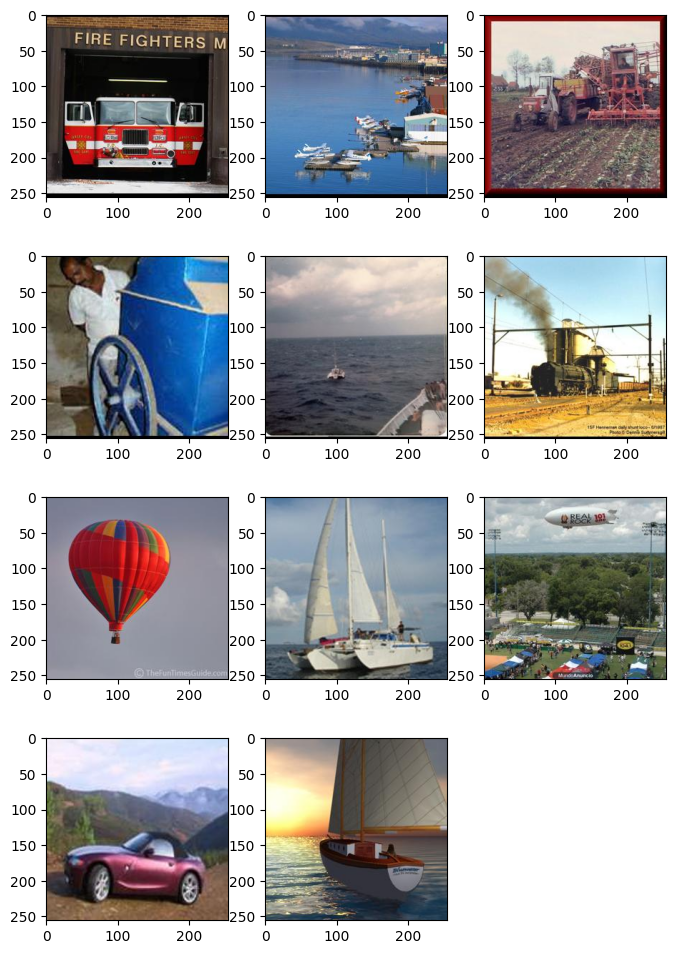

In [24]:
import operator
jaccardArr = sorted(jaccardArr, key=operator.itemgetter(0))
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,12))
rows = 4
columns = 3
for i in range(1,rows*columns):
    fig.add_subplot(rows, columns, i)
    plt.imshow(cv.cvtColor(cv.imread(jaccardArr[-i][1]), cv.COLOR_BGR2RGB))
    print(jaccardArr[-i])
plt.show()

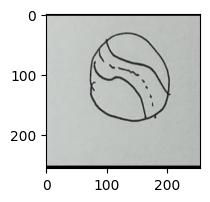

In [22]:
fig = plt.figure(figsize=(2,2))
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))